# Reinforcing Monopoly in a Discrete Choice model

Each consumer can tell how much she likes a product a firm supplies. Depending on the asking price, a consumer decides whether to purchase it or not. It may well happen that some consumers dislike everything the firm provides, and do not purchase any product from the firm. The firm could add new varieties of the product on the market in order to increase its share of consumers. Not only does the new product may interest unsatisfied consumers, but it also reinforces providing consumers who already liked the firms with potentially a better alternative.

This notebook illustrates a monopolist who offers additional varieties of a homogeneous product over time. It aims to maximize intertemporal profit by choosing its asking price for each variety, and by adding new variety. However, adding new products is costly, it must balance change in market shares with additional products, different prices and the costs of introducing new goods on the market. Consumers are characterized by idiosyncratic tastes. Idiosyncratic tastes means that consumers have different tastes one another: two consumers may value diferently the same product. Consumers are after one unit of one product, and, as a consequence, they would purchase the one that provides the greatest valuation minus price.

A first section aims to compute the monopolist's profit at any time. In theory [cf paper], the monopolist asks the same price for each alternative at a given time. The profit maximizing price depends exclusively on the number of variety the monopolist offers. This price also determines the number of consumers who purchase a product, hence the demand. Therefore, at any given time, the profit is a function of the the number of products the monopoly offers. 

Then, the issue of intertemporal profit is addressed in a second section. The monopolist aims to invest optimally in new products. Because the profit function is concave in the number of alternatives, an optimal policy exists and is unique [cf paper]. In a nutshell, there is a threshold in the number of alternative the monopolist should not exceed. At any time, the monopolist should invest as much as possible and attain this threshold in the limitation of his cumulative profit.

In a third section, a simple loop acts as a simulation.

The result of the simulation is presented with four plots. These plots depict the evolution of:
 - The number of product the firm provides over time. It is increasing as additional products yield greater demand and at optimum, a greater price for the following periods.
 - The price. It increases over time as consumers expected greater utilty.
 - The firm's demand increases.
 - The profit increases.
 - The buyer's expected valuation of the product they buy increases.
 - The buyer's utility decreases.
 
Finally, a conclusion section wraps up and discuss improvements.

---

Before starting the analysis, let us just import some packages:
 * math for some mathematical operations
 * matplotlib to plot results
 * numpy to manage arrays

In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt

## From consumers tastes to a profit function

Consumer tastes is given by a random variable. For each products the monopolist sells, a consumer would get a valuation that is drawn from a rendom variable. Each draw is independant and identically distributed for each products and each consumers.

(TO DO: more general distribution as any log-concave distribution would yield a unique maximum profit at each time)

In the following, this random variable is uniform between 0 and 1. So the valuation a consumer gets when purchase the $i^{\textrm{th}}$ good the monopolist provides is:

\begin{equation}
v_{i} \sim \mathcal{U} \left[ 0, 1 \right]
\end{equation}

The monopolist chooses a price $p_{i}$ for each goods. Given a valuation and a price, a consumer gets utility 

\begin{equation}
u \left( v_{i} - p_{i} \right) = v_{i} - p_{i}
\end{equation}

Since consumers purchase only one unit of a good, they independently maximize utility given by:

\begin{equation}
U = \begin{cases} \max_{i = 1, ..., k} v_{i} - p_{i} & \mbox{if } \max_{i = 1, ..., k} v_{i} - p_{i} > 0 \\ 
                0 & \mbox{otherwise }
\end{cases}
\end{equation}

The monopolist aims to maximize profit. At each time, the monopolist provides $k_{t}$ goods and decides a asking price for each good. Given the symmetric character of problem, the monopolist will ask the same price $p$ for each good. The demand for the monopolist is the number of consumers for which at least one valuation $v_{i}$ exceeds the asking price. In other words, a consumer would purchase a product if $\max_{i = 1,..., k} v_{i} - p > 0$. Hence the demand function:

\begin{equation}
D_{k} \left( p \right) =  \mathbb{P} \left( \max_{i = 1,..., k} v_{i} - p > 0 \right) = 1 - p^{k}
\end{equation}

Therefore, he maximizes:

\begin{equation}
\pi \left( p, k \right) = k D_{k} \left( p \right) p =  k (k + 1)^{- \frac{k + 1}{k}}
\end{equation}

The profit maximizing price is uniquely determined by the number of goods $k$: $p_{k}^{*} = \left( k + 1 \right)^{- \frac{1}{k}}$. In the following, it will be assumed that the monopolist maximizes profit, and so set a price equal to $p_{k}^{*}$. As a result the monopolist enjoys a profit equal to:

\begin{equation}
\pi \left( k \right) = k (k + 1)^{- \frac{k + 1}{k}}
\end{equation}

Note that $\pi \left( k \right)$ exclusively depends on $k$. It is then enough to directly regard the profit function as a function of $k$ only. So in the code, only $\pi \left( k \right)$ is defined.

In [2]:
def price(k):
    return (k + 1)**(-1 / k)


def profit(k):
    return k * (k + 1) ** (- (k + 1)/(k))

## Intertemporal profit

Let us move on towards an intertemporal model, where the monopolist decides on a number of goods to add in the market at each periods of time. To simplify, the time horizon $T$ is finite, i.e. $T < \infty$.

(TO DO: deal with infinite time horizon)

The monopolist aims to maximize intertemporal profit. To do so, he has the right to invest in new goods, as long as he has accumulated enough profit to do so. Adding a good on the market is costly: the monopolist incurs a cost $c$ each time he introduces a new good on the market. The monopolist maximizes:

\begin{equation}
\Pi_{1}^{T} = \sum_{t = 1}^{T} \pi \left( k_{t} \right) =  k_{t} (k_{t} + 1)^{- \frac{k_{t} + 1}{k_{t}}} - c \left( k_{t} - k_{t - 1} \right)
\end{equation}

subect to the constraint that $c \left( k_{t} - k_{t - 1} \right) < \Pi_{1}^{t}$, $\forall t \leq T$ 

His problem reduces to choosing the right number of goods $k_{t}$ to provide at each periods of time. This is an optimal control problem.

Note that $\pi \left( k \right) = k D_{k} \left( p \right) p =  k (k + 1)^{- \frac{k + 1}{k}}$ is strictly increasing and striclty concave. So adding a new good yeilds marginal benefits. The goal is to check whether paying the investment cost is worth the accumulation of these marginal benefit for the remaining time. So investing earlier is better as the monopolist enjoys its marginal benefits for a longer period of time.

Yet concavity suggests that benefits increases, but at a decreasing rate. So at each time, there is a unique number of goods $k_{t}^{*}$ that maximize profit for the remaining period of time. [see paper or to develop]

In fact, the optimal strategy consists provide $k_{t}^{*}$ goods if possible. If the monopolist lacks of funds, he should invest as much as possible, i.e. floor$\left( \Pi_{1}^{t} / c \right)$

The monopolist should invest:

\begin{equation}
\min \left\lbrace k_{t}^{*}, \textrm{floor}\left( \Pi_{1}^{t} / c \right) \right\rbrace
\end{equation}

In [3]:
def max_investment(current_profit):
    '''
    floor(Π_1^t / c)
    '''
    return math.floor(current_profit / investment_cost)


def argmax_finder(t, k_start=1, imax=100000):
    '''
    k_t^*
    '''
    tmp = profit(k_start)
    for i in range(0, imax + 1):
        new = (T - t) * profit(i + k_start) - investment_cost * i
        if new < tmp:
            return i - 1
        tmp = new
        if(i == imax):
            log.warning('Iteration max {}'.format(imax))
    return i


def optimal_investment(t, profits, products):
    return min(max_investment(sum(profits)), argmax_finder(t, k_start=products[t]))

## Simulation

At each time, the monopolist knows the number of good he should invest in. To run a simulation, choose a time horizon $T$, the investment cost $c$, and the number of commodities the monopolist starts with.

In [4]:
T = 100  # Time horizon
investment_cost = 2  # investment cost c
initial_endowment = 1  # number of goods the monopolists has for the first period of time t = 1

products = [0] * T
profits = [0] * T
prices = [0] * T

products[0] = initial_endowment
profits[0] = profit(initial_endowment)
prices[0] = price(initial_endowment)

Then, with just have to loop over the $T$ periods of time.

In [5]:
for t in range(0, T - 1):
    invesment = optimal_investment(t, profits, products)
    products[t + 1] = products[t] + max(invesment, 0)
    profits[t + 1] = profit(products[t + 1]) - investment_cost * invesment
    prices[t + 1] = price(products[t + 1])

## Results

It is expected that:
 * The monopolist invests in more and more product until a treshold
 * The monopolist enjoys no profit as he invests, but then enjoys profits as a capitalisation of his investments
 * The monopolist gets more and more consumers as he proposes more and more goods
 * Consumers purchase products of higher valuations
 * Consumers' utility decreases over time
 
To illustrate these results, we can plot some graphs:


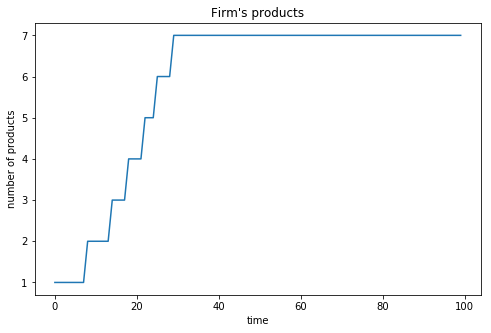

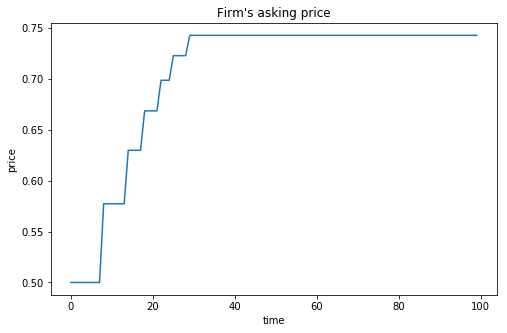

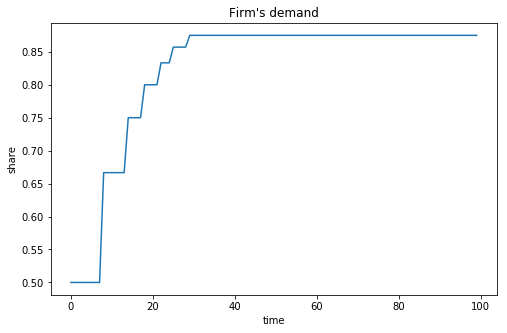

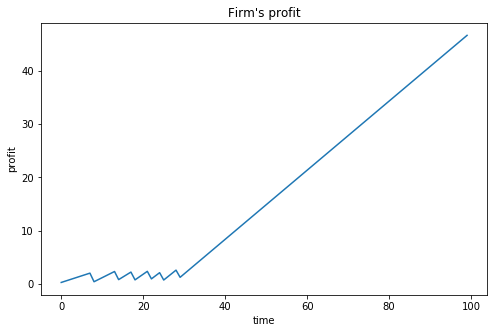

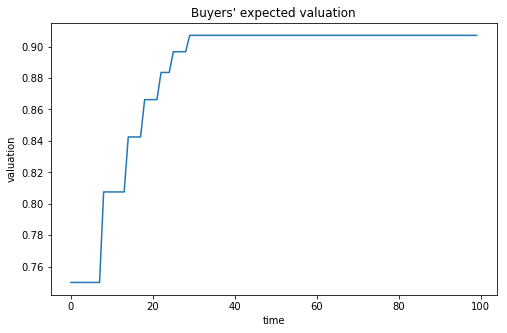

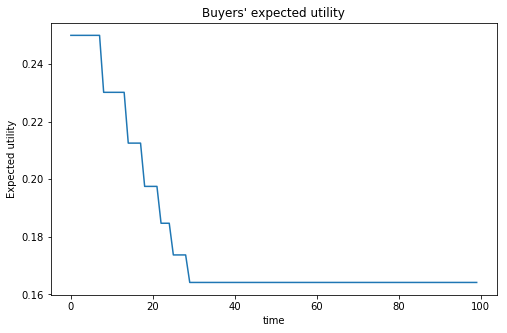

In [6]:
fig1, ax1 = plt.subplots(figsize=[8, 5])
ax1.plot(range(T), products)
ax1.set_title("Firm's products")
ax1.set_xlabel('time')
ax1.set_ylabel('number of products')

fig2, ax2 = plt.subplots(figsize=[8, 5])
ax2.plot(range(T), prices)
ax2.set_title("Firm's asking price")
ax2.set_xlabel('time')
ax2.set_ylabel('price')

fig3, ax3 = plt.subplots(figsize=[8, 5])
ax3.plot(range(T), [k/(k + 1) for k in products])
ax3.set_title("Firm's demand")
ax3.set_xlabel('time')
ax3.set_ylabel('share')

fig4, ax4 = plt.subplots(figsize=[8, 5])
ax4.plot(range(T), np.cumsum(profits))
ax4.set_title("Firm's profit")
ax4.set_xlabel('time')
ax4.set_ylabel('profit')

fig5, ax5 = plt.subplots(figsize=[8, 5])
ax5.plot(range(T), [k/(k + 1) * (1 - price(k)**(k + 1)) / (1 - price(k)**k) for k in products])
ax5.set_title("Buyers' expected valuation")
ax5.set_xlabel('time')
ax5.set_ylabel('valuation')

fig6, ax6 = plt.subplots(figsize=[8, 5])
ax6.plot(range(T), [k * (1 - price(k)**(k + 1)) / (1 - price(k)**(k)) / (k + 1) - price(k) for k in products])
ax6.set_title("Buyers' expected utility")
ax6.set_xlabel('time')
ax6.set_ylabel('Expected utility')
plt.show()

## Conclusion

The monopolist greatly benefits from the introduction of new products. It asks a greater price to a greater share of consumers, and so it acquires greater profit at each time. Morevoer, it may invest faster as its profit increases with the number of products it povides on the market. As soons as investment stops, the monopolist enjoys linear profit over time.

On the other hand, the consumers are worse off. Despite purchasing products they prefer, their average utility decrease as the price increases.

(TO DO: Measure the increase in valuation minus increase in price)

This framework can be improved. First, valuations need not be uniformly distributed. More generally, similar results can be found if the density of tastes is log-concave. The monopolist still have a unique profit maximizing price at each time, and its inter-temporal profit is concave in the number of products. Consequently, an optimal investment policy exists and is unique.

(TO DO: Simulations)

Second, the firm could have competitors. Competition raises issues regarding the existence of a profit maximizing price and pointed out by Caplin and Nalebuff. The instances where an equilibrium exist and is unique are: a duopoly where all consumer purchase a unit of a good regardless the price, and an oligopoly where firms provide only one unit of a good. The whole analysis in this paper focuses on the ability of firms to provide new alternatives, so the latter can be ruled out. On the other hand, a duopoly model could be insightful. Duopolists have an additional motivation to provide more alternative to steal (or protect) market share. The effect on price is unclear as firms may compete on price as well. A probable consequence is that consumers will benefit from more alternatives at cheaper prices.  